In [5]:
from pathlib import Path
import os
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from operator import itemgetter
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.decomposition import PCA
import matplotlib.image as mpimg 
import cv2
pd.set_option('display.max_columns', 500)

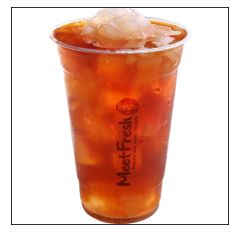

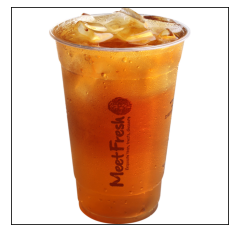

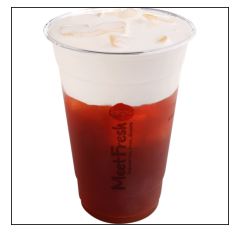

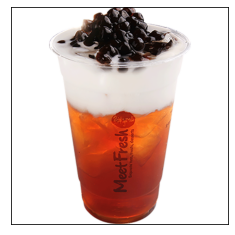

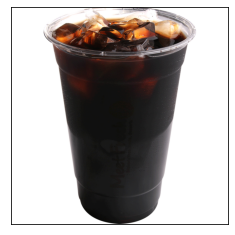

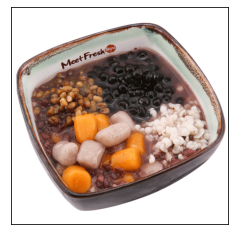

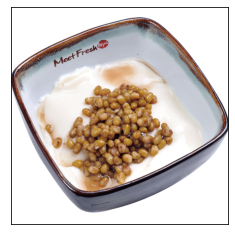

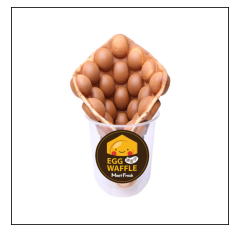

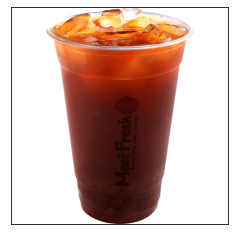

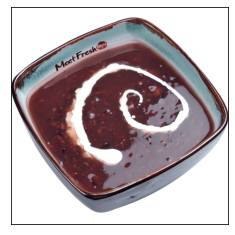

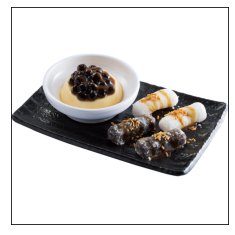

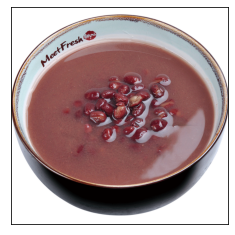

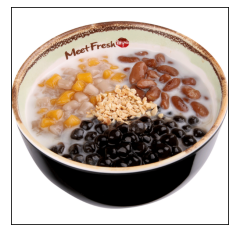

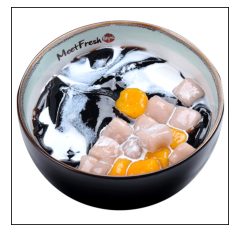

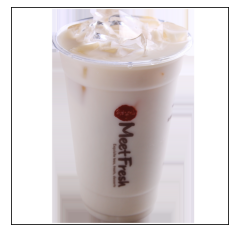

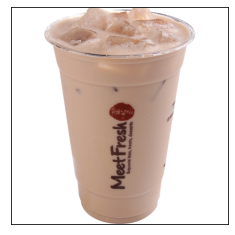

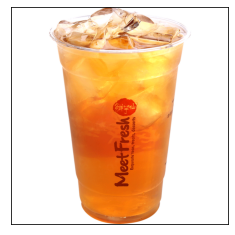

['Black-Tea-w-Lychee-Jelly.png', 'Black-Tea.png', 'Fluffy-Black-Tea.png', 'Fresh-Milk-Black-Tea-w-Boba.png', 'Herbal-Teas.png', 'Hot-Taro-Ball-1.png', 'Mung-Bean-Tofu-Pudding.png', 'Original-waffle.jpg', 'Pineapple-Black-Tea.png', 'Purple-Rice-Soup.png', 'Q-Mochi-Egg-Pudding-Combo.png', 'Red-Bean-Soup.png', 'Signature-Hot-Almond-Soup.png', 'Signature-Icy-Grass-Jelly.png', 'Soy-Milk.png', 'Traditional-Milk-Tea.png', 'Winter-Melon-Tea.png']
(17, 1920000)


In [14]:
fname=[]
imgall=[]
for filename in os.listdir(r"./meetfresh"):
    fname.append(filename)
    img=cv2.imread(r"./meetfresh/"+filename)
    b,g,r = cv2.split(img)
    rgb_img = cv2.merge([r,g,b])
    plt.imshow(rgb_img)
    plt.xticks([]), plt.yticks([]) 
    plt.show()
    imgr=cv2.resize(img, (800,800), interpolation = cv2.INTER_AREA).flatten().tolist()
    imgall.append(imgr)

imgall=np.matrix(imgall)/255
print(fname)
print(imgall.shape)


In [15]:
n_components = 0.95
pca = PCA(n_components)
pimg = pca.fit_transform(imgall)

Text(0.5, 1.0, 'Cumulative variance explained by PC')

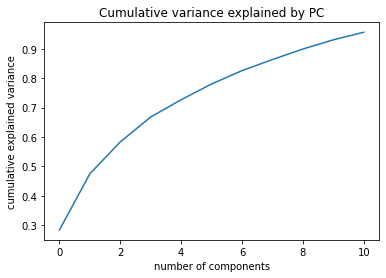

In [16]:
# plot cumulative variance explained
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.title('Cumulative variance explained by PC')

In [27]:
np.set_printoptions(edgeitems=30, linewidth=100000,formatter=dict(float=lambda x: "%.3g" % x))
pimg

array([[-182, -60, -26.3, -3.32, -40.7, 34.4, -79.4, -39.6, 10, -11.3, -44.1],
       [-186, -63.2, -11.6, 15.2, -25.7, 25.4, -103, -24.3, 30.1, -30, -14.6],
       [-143, 22, 88.8, 92.7, 53.7, -15.7, 16.6, 33.7, -5.97, -17.2, 169],
       [-168, 0.424, 150, -22.8, 127, -95.8, -18.5, 35.3, -99.5, 118, -63.2],
       [-153, -264, -128, -3.68, -10.5, -88.6, 139, 0.276, 42.9, 11.4, -24.4],
       [202, -57.1, -121, -139, -37, 65.3, -43.6, -0.778, 42.1, 161, 67.5],
       [86.3, 87.5, 86.3, -92, 158, 54.8, 33.2, 61, 164, -41.7, -40.5],
       [-67.2, 269, -44.4, -95, -102, 88.5, 85.9, -7.37, -60.1, -11.8, -37.8],
       [-183, -174, -72.7, 31.6, -34.6, -4.42, 26.8, -21.5, 27.8, -27, 7.88],
       [240, -53.8, -126, -138, 132, -52, -34.6, -83.5, -96.9, -95.9, 22.5],
       [152, 276, -197, 210, 14.9, -116, -33.9, 5.23, 40.3, 24.4, -24.7],
       [241, -173, 0.215, 40.1, -72.5, 24.3, -49.2, 193, -58.8, -47.2, -25.1],
       [223, -114, 87.4, 199, 49.2, 159, 71.4, -91.4, -36.7, 26.5, -27.2],


In [28]:
cosine_sim=cosine_similarity(pimg,pimg)
cosine_sim

array([[1, 0.969, 0.157, 0.257, 0.416, -0.349, -0.416, -0.00671, 0.75, -0.457, -0.406, -0.386, -0.396, -0.509, -0.188, 0.295, 0.745],
       [0.969, 1, 0.311, 0.25, 0.367, -0.405, -0.349, -0.127, 0.738, -0.474, -0.381, -0.35, -0.399, -0.483, -0.216, 0.224, 0.796],
       [0.157, 0.311, 1, 0.373, 0.03, -0.538, -0.0998, -0.0957, 0.253, -0.487, -0.137, -0.362, -0.142, -0.25, 0.338, 0.297, 0.422],
       [0.257, 0.25, 0.373, 1, 0.0801, -0.436, -0.0171, -0.0842, 0.0825, -0.323, -0.313, -0.354, -0.266, -0.149, 0.0835, 0.36, 0.339],
       [0.416, 0.367, 0.03, 0.0801, 1, -0.0738, -0.361, -0.399, 0.87, -0.0951, -0.382, -0.0161, -0.147, -0.33, -0.396, -0.0468, -0.224],
       [-0.349, -0.405, -0.538, -0.436, -0.0738, 1, 0.0804, -0.0975, -0.273, 0.473, 0.0464, 0.368, 0.148, 0.178, -0.315, -0.475, -0.456],
       [-0.416, -0.349, -0.0998, -0.0171, -0.361, 0.0804, 1, 0.0555, -0.491, 0.146, 0.0199, -0.0399, 0.0483, 0.145, 0.107, -0.00519, -0.122],
       [-0.00671, -0.127, -0.0957, -0.0842, -0.399,

In [29]:
ac=abs(cosine_sim)
ac=np.matrix.round(ac,decimals=2)
ac

array([[1, 0.97, 0.16, 0.26, 0.42, 0.35, 0.42, 0.01, 0.75, 0.46, 0.41, 0.39, 0.4, 0.51, 0.19, 0.3, 0.74],
       [0.97, 1, 0.31, 0.25, 0.37, 0.41, 0.35, 0.13, 0.74, 0.47, 0.38, 0.35, 0.4, 0.48, 0.22, 0.22, 0.8],
       [0.16, 0.31, 1, 0.37, 0.03, 0.54, 0.1, 0.1, 0.25, 0.49, 0.14, 0.36, 0.14, 0.25, 0.34, 0.3, 0.42],
       [0.26, 0.25, 0.37, 1, 0.08, 0.44, 0.02, 0.08, 0.08, 0.32, 0.31, 0.35, 0.27, 0.15, 0.08, 0.36, 0.34],
       [0.42, 0.37, 0.03, 0.08, 1, 0.07, 0.36, 0.4, 0.87, 0.1, 0.38, 0.02, 0.15, 0.33, 0.4, 0.05, 0.22],
       [0.35, 0.41, 0.54, 0.44, 0.07, 1, 0.08, 0.1, 0.27, 0.47, 0.05, 0.37, 0.15, 0.18, 0.32, 0.47, 0.46],
       [0.42, 0.35, 0.1, 0.02, 0.36, 0.08, 1, 0.06, 0.49, 0.15, 0.02, 0.04, 0.05, 0.14, 0.11, 0.01, 0.12],
       [0.01, 0.13, 0.1, 0.08, 0.4, 0.1, 0.06, 1, 0.32, 0.2, 0.23, 0.44, 0.37, 0.19, 0.85, 0.79, 0.24],
       [0.75, 0.74, 0.25, 0.08, 0.87, 0.27, 0.49, 0.32, 1, 0.32, 0.46, 0.16, 0.2, 0.48, 0.34, 0.06, 0.23],
       [0.46, 0.47, 0.49, 0.32, 0.1, 0.47, 0.

In [33]:
results = []
for i in range(len(fname)):
    similar_items = []
    similar_items=sorted(enumerate(ac[i], start=1), key=itemgetter(1), reverse=True)[1:]
    results.append(similar_items)
results

[[(2, 0.97),
  (9, 0.75),
  (17, 0.74),
  (14, 0.51),
  (10, 0.46),
  (5, 0.42),
  (7, 0.42),
  (11, 0.41),
  (13, 0.4),
  (12, 0.39),
  (6, 0.35),
  (16, 0.3),
  (4, 0.26),
  (15, 0.19),
  (3, 0.16),
  (8, 0.01)],
 [(1, 0.97),
  (17, 0.8),
  (9, 0.74),
  (14, 0.48),
  (10, 0.47),
  (6, 0.41),
  (13, 0.4),
  (11, 0.38),
  (5, 0.37),
  (7, 0.35),
  (12, 0.35),
  (3, 0.31),
  (4, 0.25),
  (15, 0.22),
  (16, 0.22),
  (8, 0.13)],
 [(6, 0.54),
  (10, 0.49),
  (17, 0.42),
  (4, 0.37),
  (12, 0.36),
  (15, 0.34),
  (2, 0.31),
  (16, 0.3),
  (9, 0.25),
  (14, 0.25),
  (1, 0.16),
  (11, 0.14),
  (13, 0.14),
  (7, 0.1),
  (8, 0.1),
  (5, 0.03)],
 [(6, 0.44),
  (3, 0.37),
  (16, 0.36),
  (12, 0.35),
  (17, 0.34),
  (10, 0.32),
  (11, 0.31),
  (13, 0.27),
  (1, 0.26),
  (2, 0.25),
  (14, 0.15),
  (5, 0.08),
  (8, 0.08),
  (9, 0.08),
  (15, 0.08),
  (7, 0.02)],
 [(9, 0.87),
  (1, 0.42),
  (8, 0.4),
  (15, 0.4),
  (11, 0.38),
  (2, 0.37),
  (7, 0.36),
  (14, 0.33),
  (17, 0.22),
  (13, 0.15),
  (10,

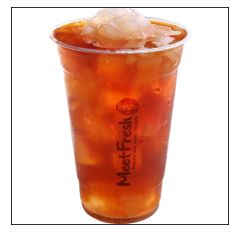

In [50]:
i=0
img=cv2.imread(r"./meetfresh/"+fname[i])
b,g,r = cv2.split(img)
rgb_img = cv2.merge([r,g,b])
plt.imshow(rgb_img)
plt.xticks([]), plt.yticks([]) 
plt.show()

In [51]:
print("Top 5 recommands for %s is"%(fname[i].split(".")[0]))

Top 5 recommands for Black-Tea-w-Lychee-Jelly is


Black-Tea


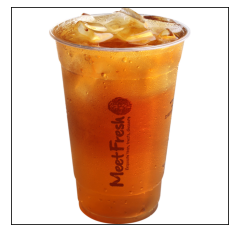

Pineapple-Black-Tea


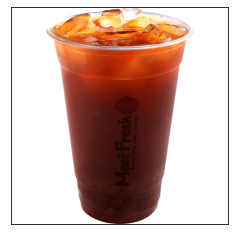

Winter-Melon-Tea


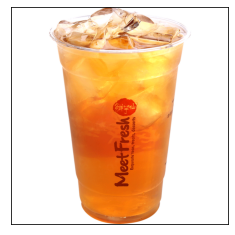

Signature-Icy-Grass-Jelly


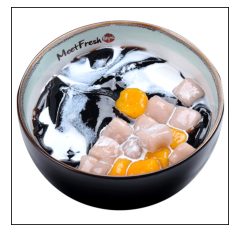

Purple-Rice-Soup


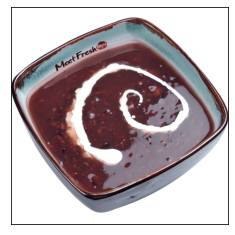

In [53]:
for j in range(5):
    print(fname[results[i][j][0]-1].split(".")[0])
    img=cv2.imread(r"./meetfresh/"+fname[results[i][j][0]-1])
    b,g,r = cv2.split(img)
    rgb_img = cv2.merge([r,g,b])
    plt.imshow(rgb_img)
    plt.xticks([]), plt.yticks([]) 
    plt.show()

Top 5 recommands for Black-Tea-w-Lychee-Jelly is


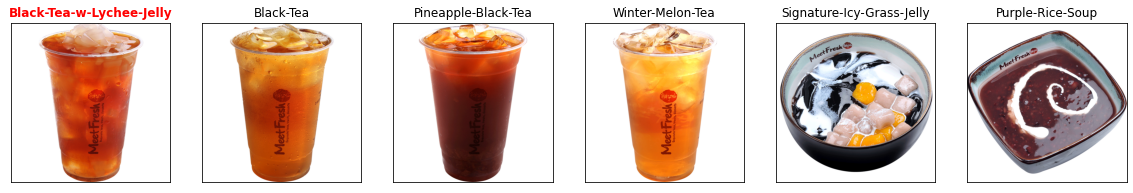

In [67]:
plt.rcParams['figure.figsize'] = [20, 20]
i=0
print("Top 5 recommands for %s is"%(fname[i].split(".")[0]))
img=cv2.imread(r"./meetfresh/"+fname[i])
b,g,r = cv2.split(img)
rgb_img = cv2.merge([r,g,b])
ax=plt.subplot(1,6,1)
plt.imshow(rgb_img)
plt.xticks([]), plt.yticks([]) 
ax.set_title(fname[i].split(".")[0],color='red',fontweight='bold')
for j in range(5):
    ax=plt.subplot(1,6,j+2)
    ax.set_title(fname[results[i][j][0]-1].split(".")[0])
    img=cv2.imread(r"./meetfresh/"+fname[results[i][j][0]-1])
    b,g,r = cv2.split(img)
    rgb_img = cv2.merge([r,g,b])
    plt.imshow(rgb_img)
    plt.xticks([]), plt.yticks([]) 
plt.show()

Top 5 recommands


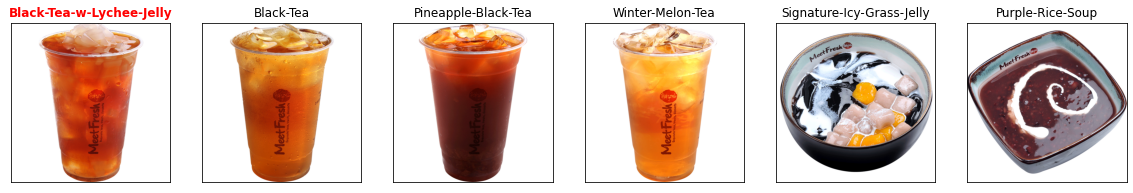

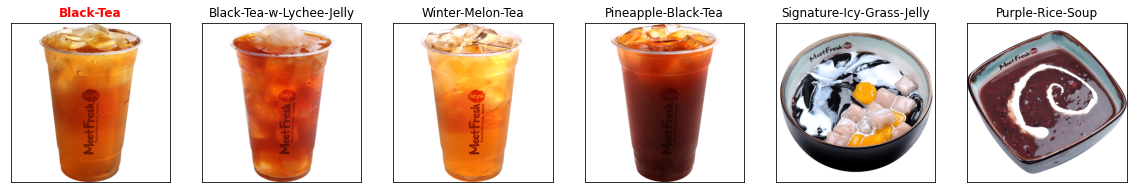

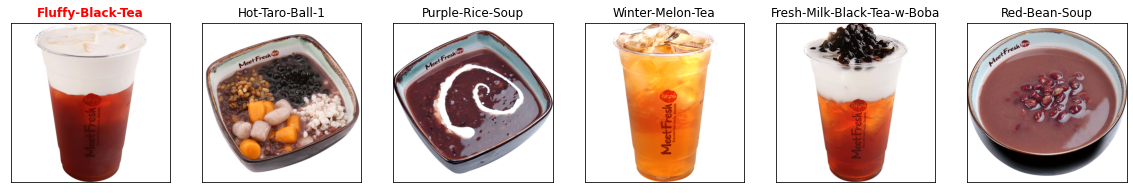

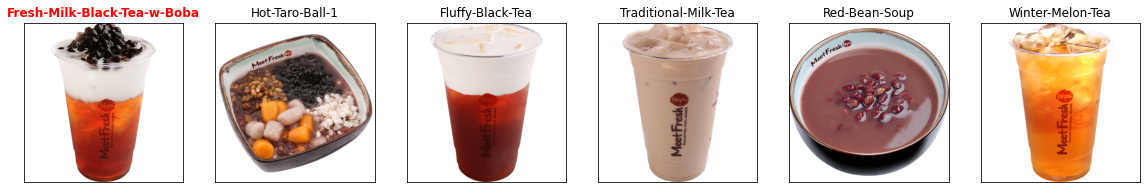

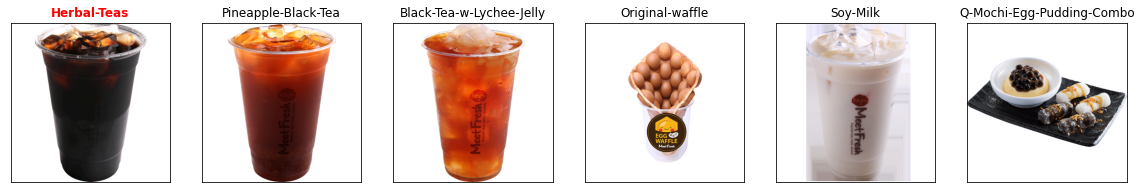

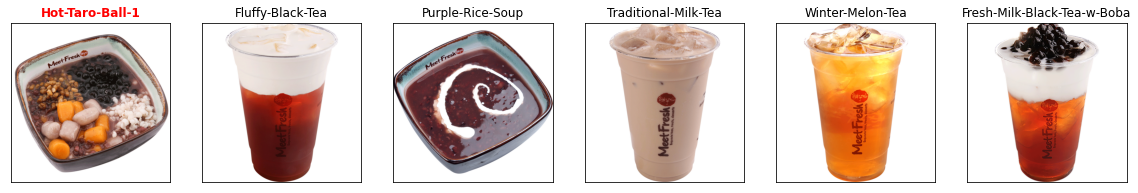

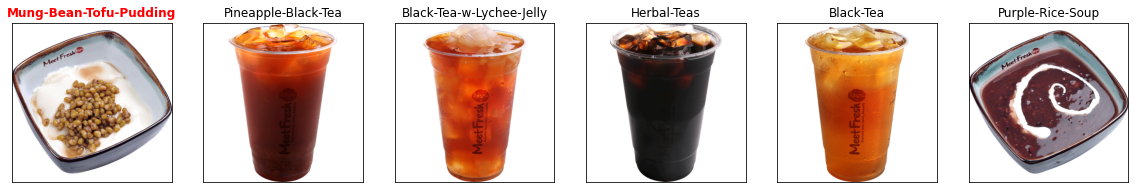

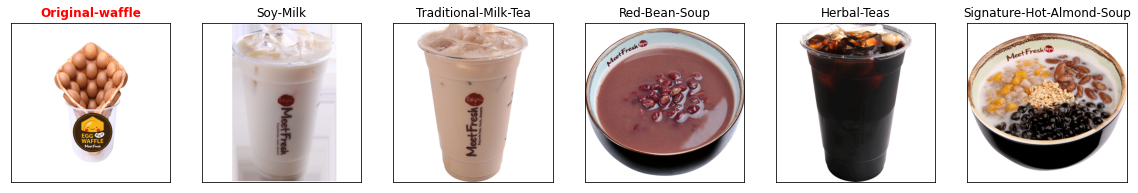

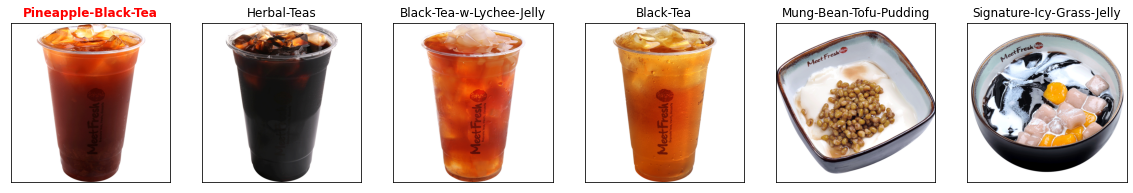

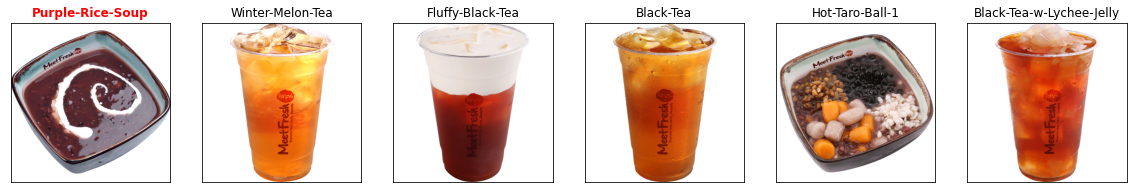

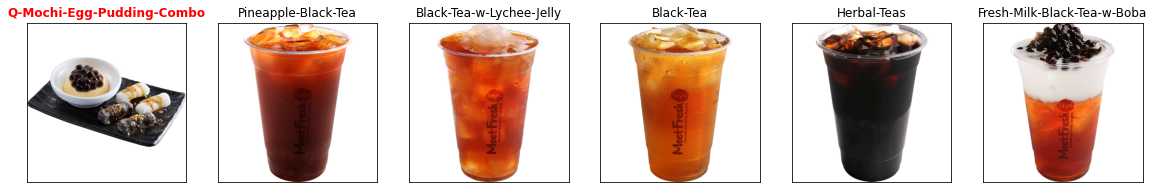

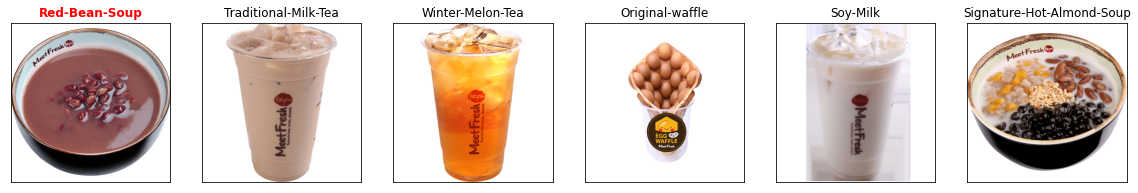

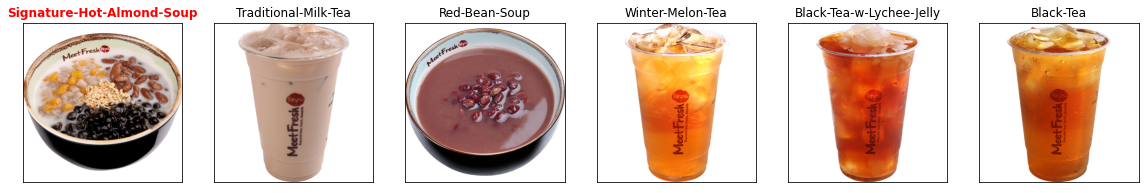

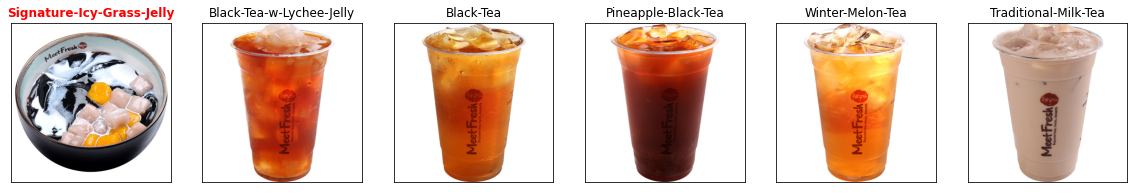

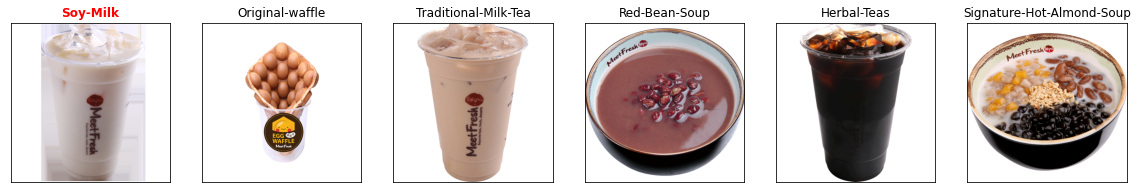

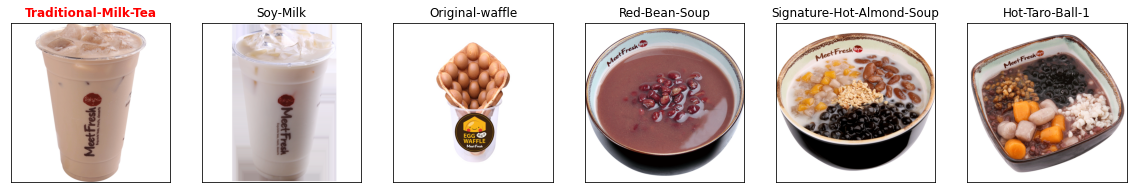

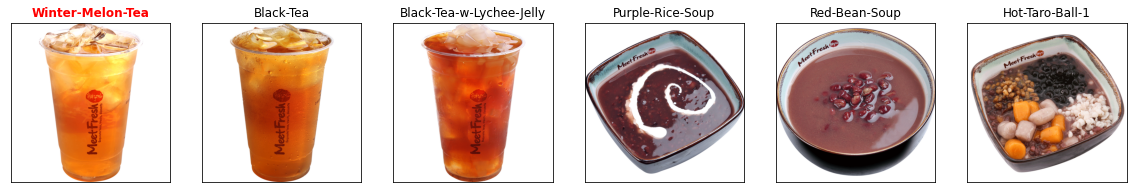

In [74]:
print("Top 5 recommands")
for i in range(len(fname)):
    #print("Top 5 recommands for %s is"%(fname[i].split(".")[0]))
    img=cv2.imread(r"./meetfresh/"+fname[i])
    b,g,r = cv2.split(img)
    rgb_img = cv2.merge([r,g,b])
    ax=plt.subplot(1,6,1)
    plt.imshow(rgb_img)
    plt.xticks([]), plt.yticks([]) 
    ax.set_title(fname[i].split(".")[0],color='red',fontweight='bold')
    for j in range(5):
        ax=plt.subplot(1,6,j+2)
        ax.set_title(fname[results[i][j][0]-1].split(".")[0])
        img=cv2.imread(r"./meetfresh/"+fname[results[i][j][0]-1])
        b,g,r = cv2.split(img)
        rgb_img = cv2.merge([r,g,b])
        plt.imshow(rgb_img)
        plt.xticks([]), plt.yticks([]) 
    plt.show()
